---
# Rebuttal code

In [1]:
from linescanning import (
    utils,
    plotting,
    prf,
    fitting
)

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pRFline
from pRFline.utils import SubjectsDict
from pRFline import figures
import seaborn as sns
opj = os.path.join
opd = os.path.dirname

---
# Set defaults

In [2]:
# set defaults
task        = "task-pRF"
base_dir    = "/data1/projects/MicroFunc/Jurjen/projects/VE-pRF"
prog_dir    = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline"
# design_dir  = opj(prog_dir, "data_lp3")
design_dir  = opj(base_dir, "derivatives", "prf")
fig_dir     = opj(prog_dir, "figures")
data_dir     = opj(prog_dir, "data")
results_dir     = opj(prog_dir, "results")

In [3]:
# fetch subject dictionary from pRFline.utils.SubjectsDict
model = "gauss"
subj_obj = SubjectsDict()
dict_data = subj_obj.dict_data
process_subjs = subj_obj.get_subjects()
process_subjs

['sub-001', 'sub-002', 'sub-003', 'sub-005', 'sub-007', 'sub-008']

In [4]:
colors=["#DE3163", "#6495ED"]
cmap1 = utils.make_binary_cm(colors[0])

subjects = list(dict_data.keys())
cmap_subj = "Set2"
sub_colors = sns.color_palette(cmap_subj, len(subjects))
subjects

['sub-001', 'sub-002', 'sub-003', 'sub-005', 'sub-007', 'sub-008']

---
# Main data parser

In [5]:
params_fn = opj(data_dir, f"sub-all_model-{model}_desc-full_params.csv")
im5 = figures.DepthHRF(
    full_dict=params_fn, 
    deriv=opj(base_dir, 'derivatives'),
    hrf_csv=opj(data_dir, f"sub-all_model-gauss_desc-hrf_across_depth.csv"),
    metric_csv=opj(data_dir, "sub-all_model-gauss_desc-hrf_metrics.csv"),
    verbose=True,
    label_size=18,
    # subject="sub-003",
    code=3)

Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_model-gauss_desc-full_params.csv'
Reading design matrix from '/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/prf/sub-003/ses-2/sub-003_ses-2_task-pRF_run-avg_desc-design_matrix.mat'
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'
Instantiate HRF with: [1, 4.6, 0] (fit=False)
Using constraint(s): ['tc', 'tc']
Inserting parameters from <class 'numpy.ndarray'> as 'gauss_iter' in <pRFline.figures.DepthHRF object at 0x7fa8a0a1cb20>
Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_model-gauss_desc-hrf_across_depth.csv'
Reading '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/data/sub-all_model-gauss_desc-hrf_metrics.csv'


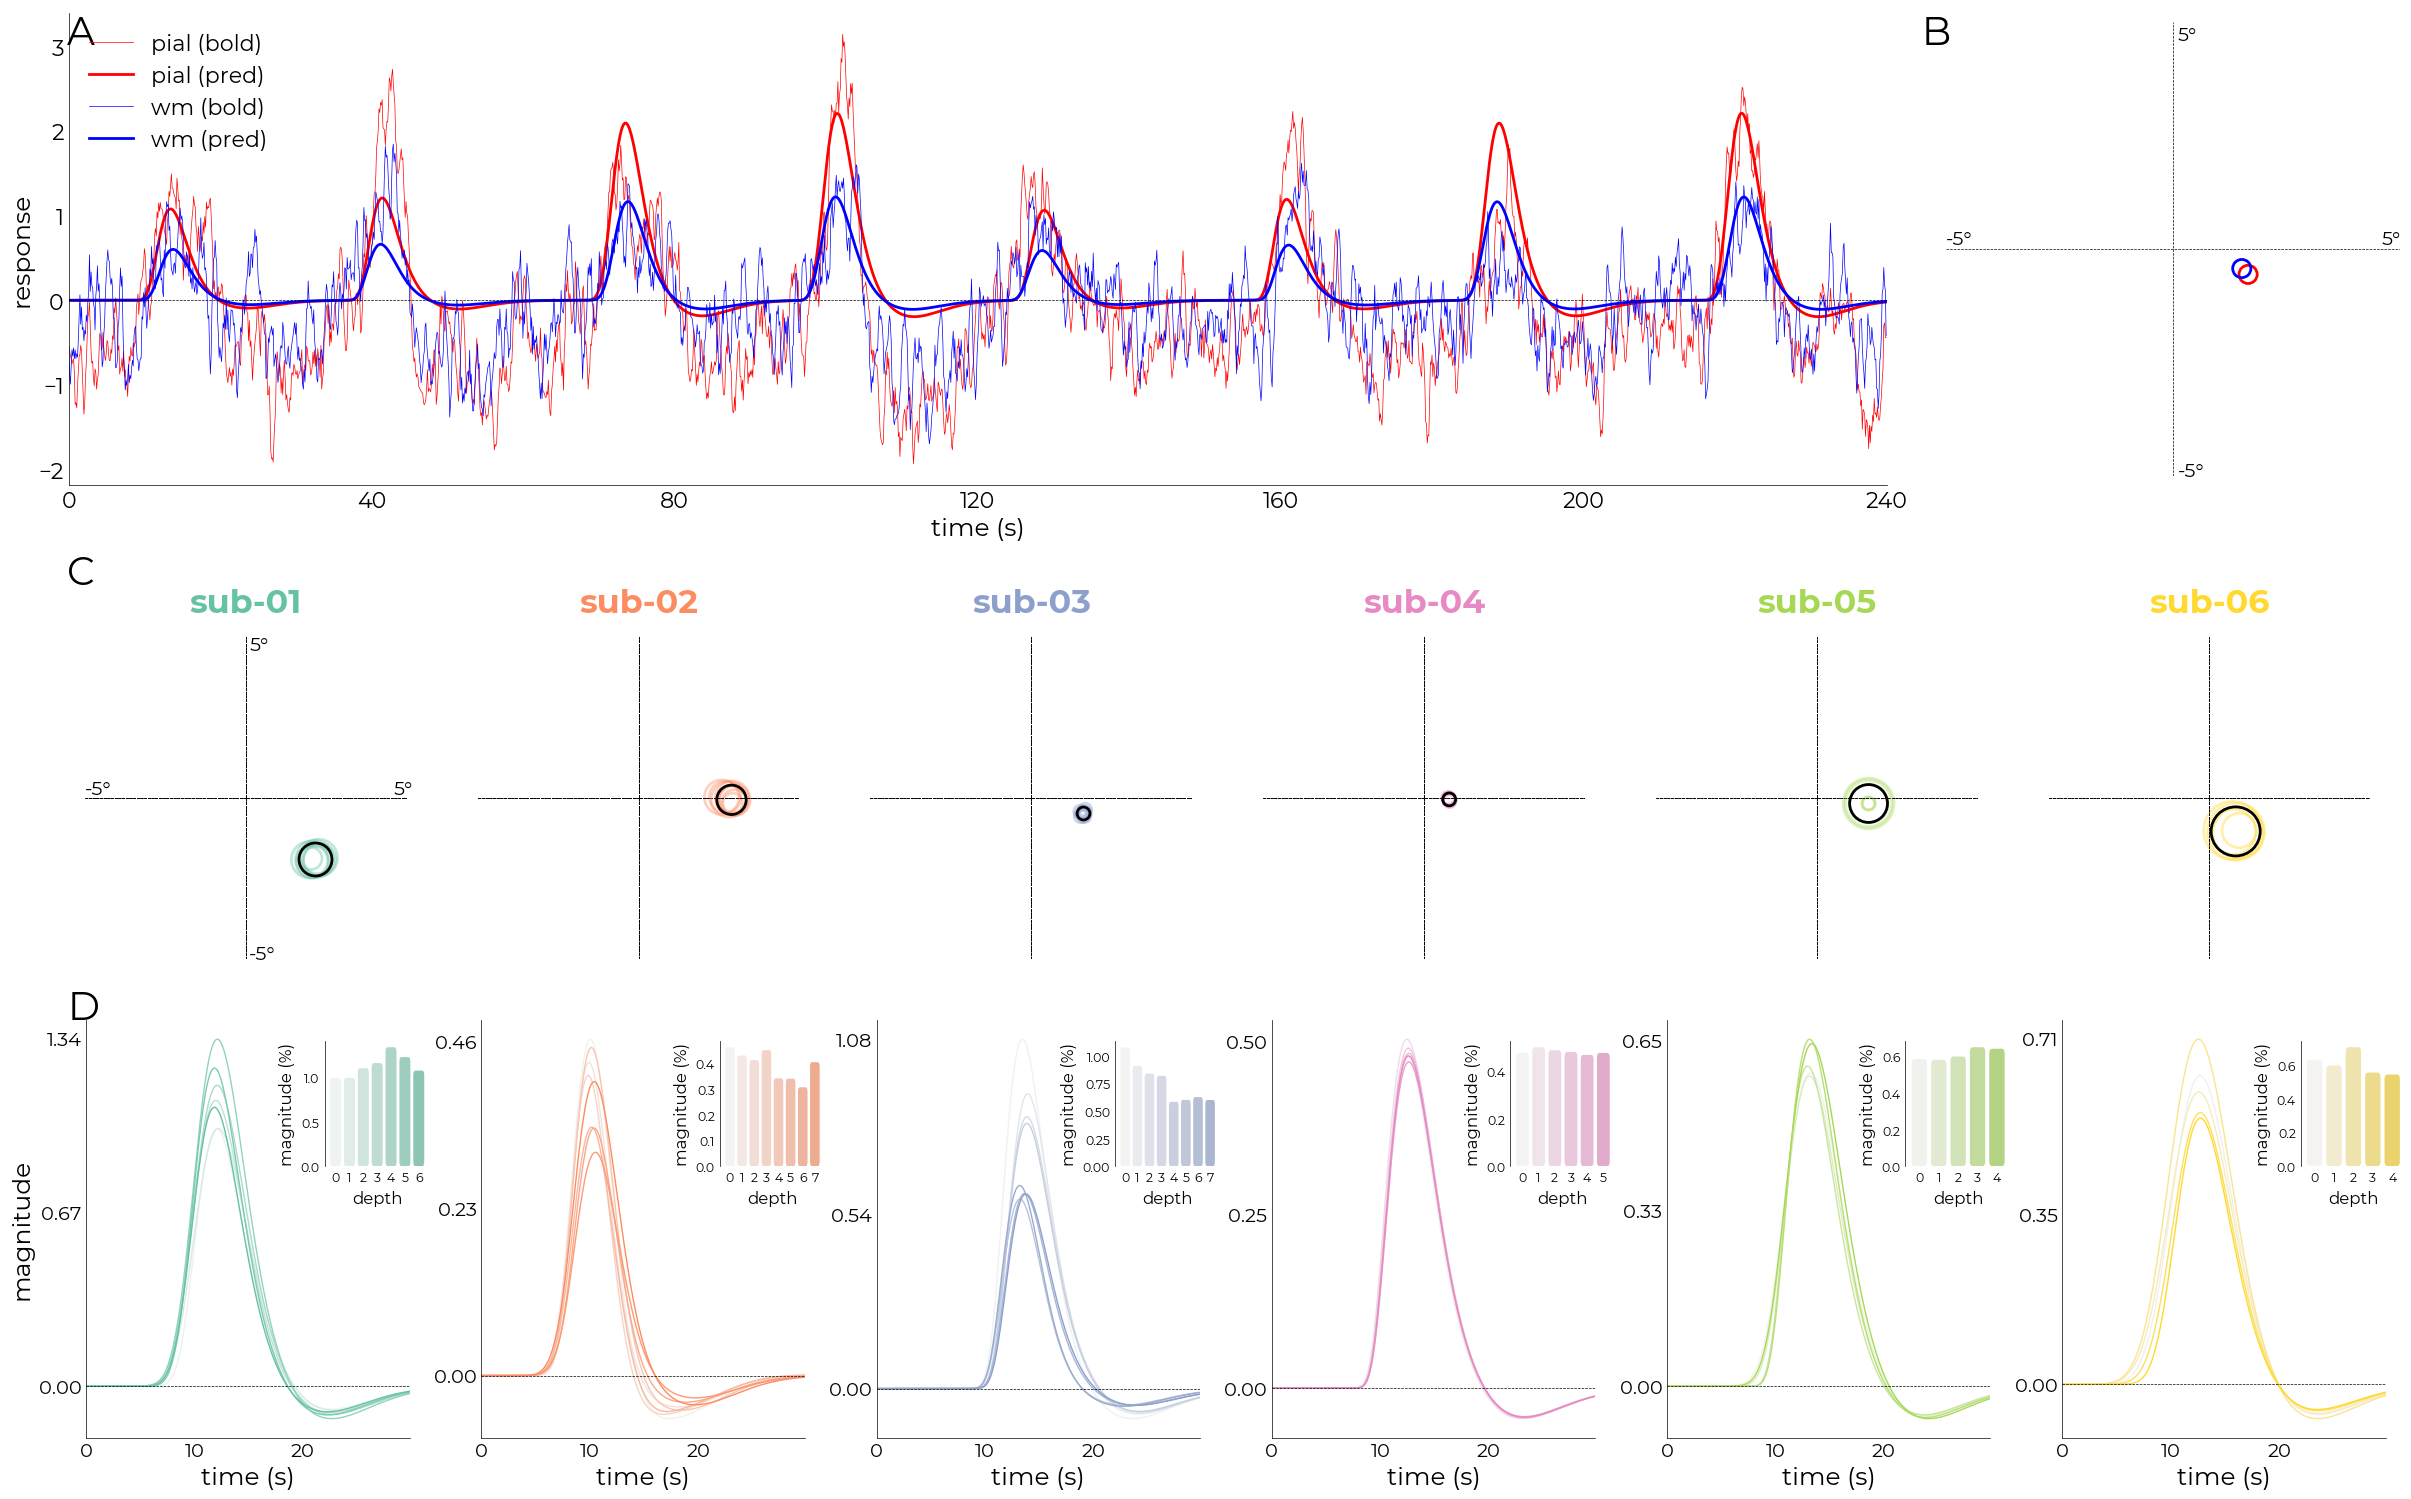

In [140]:
%matplotlib inline
im5.compile_depth_figure2(
    insets="mag",
    # save_as=opj(fig_dir, f"sub-all_model-gauss_fig-6_desc-hrf_depth")
)

In [23]:
tcs.shape

(2286, 2)

In [6]:
# fit wm/pial timecourses without fixing baseline
tcs = np.concatenate([im5.pial_tc[...,np.newaxis],im5.wm_tc[...,np.newaxis]], axis=1)
mag_fit = prf.pRFmodelFitting(
    tcs.T,
    design_matrix=im5.design_matrix,
    verbose=True,
    model="gauss",
    fix_bold_baseline=False,
    fit_hrf=True,
    TR=0.105,
    nr_jobs=2
)
mag_fit.fit()

Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'
Instantiate HRF with: [1, 4.6, 0] (fit=True)
Using constraint(s): ['tc', 'tc']
Starting gauss gridfit at 2023/07/06 15:11:21
Each batch contains approx. 1 voxels.


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:433: RuntimeWarning: divide by zero encountered in divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:433: RuntimeWarning: divide by zero encountered in divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:442: RuntimeWarning: invalid value encountered in multiply
  slopes[..., np.newaxis] *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:442: RuntimeWarning: invalid value encountered in multiply
  slopes[..., np.newaxis] *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:441: RuntimeWarning: invalid value encountered in subtract
  resid = np.linalg.norm((vox_data -
/data1/projects/MicroFunc/Jurjen/programs/packages/pr

Completed Gaussian gridfit at 2023/07/06 15:11:36. Voxels/vertices above 0.1: 2/2
Gridfit took 0:00:15.148109 | Mean rsq>0.1: 0.39
Starting gauss iterfit at 2023/07/06 15:11:36


/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':


Completed Gaussian iterfit at 2023/07/06 15:16:23. Mean rsq>0.1: 0.52
Iterfit took 0:04:46.424272


In [18]:
%matplotlib inline
_,_,_,pial_pred2 = mag_fit.plot_vox(make_figure=False)
_,_,_,wm_pred2 = mag_fit.plot_vox(vox_nr=1,make_figure=False)

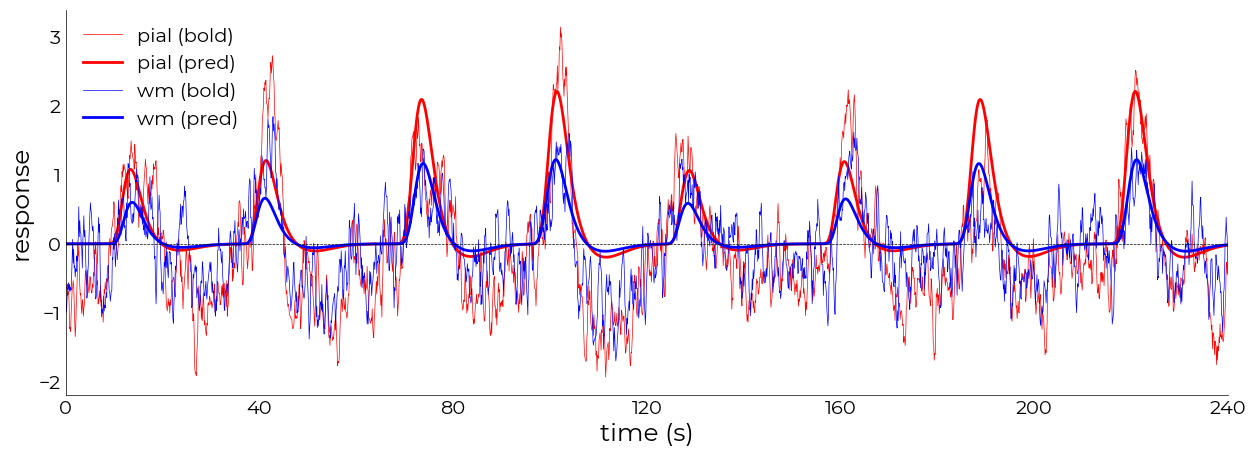

In [46]:
im5.plot_pial_wm_timecourses()

In [11]:
raw_tcs = np.load(
    opj(
        base_dir,
        "derivatives",
        "prf",
        im5.subject,
        "ses-2",
        f"{im5.subject}_ses-2_task-pRF_desc-data_for_fitter_raw.npy"))

rib_range = im5.subj_obj.get_ribbon(im5.subject)
use_ranges = [rib_range[0],rib_range[1]-1]

# get the predictions
pial_raw = raw_tcs[:,use_ranges[0]]
wm_raw = raw_tcs[:,use_ranges[1]]

pial_raw.shape

(2286,)

In [26]:
# fit wm/pial timecourses without fixing baseline
tc_raw = np.concatenate([pial_raw[...,np.newaxis],wm_raw[...,np.newaxis]], axis=1)
raw_fit = prf.pRFmodelFitting(
    tc_raw.T,
    design_matrix=im5.design_matrix,
    verbose=True,
    model="gauss",
    fix_bold_baseline=False,
    fit_hrf=True,
    TR=0.105,
    old_params=mag_fit.gauss_iter,
    nr_jobs=2
)
raw_fit.fit()

Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'
Instantiate HRF with: [1, 4.6, 0] (fit=True)
Using constraint(s): ['tc', 'tc']
Inserting parameters from <class 'numpy.ndarray'> as 'iterative_search_params' in <linescanning.prf.pRFmodelFitting object at 0x7fa881cb7b80>
Gaussian fitter: <prfpy.fit.Iso2DGaussianFitter object at 0x7fa8816cee20>
HRF already fitted, setting 'fit_hrf' in '<prfpy.fit.Iso2DGaussianFitter object at 0x7fa8816cee20>' to False
Starting gauss iterfit at 2023/07/06 16:06:56


/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/home/heij/.conda/envs/dev2/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Completed Gaussian iterfit at 2023/07/06 16:10:24. Mean rsq>0.1: 0.28
Iterfit took 0:03:28.392106


In [29]:
# fit wm/pial timecourses without fixing baseline
tc_raw = np.concatenate([pial_raw[...,np.newaxis],wm_raw[...,np.newaxis]], axis=1)
raw_fit2 = prf.pRFmodelFitting(
    tc_raw.T,
    design_matrix=im5.design_matrix,
    verbose=True,
    model="gauss",
    fix_bold_baseline=False,
    fit_hrf=True,
    TR=0.105,
    screen_distance_cm=196,
    # old_params=mag_fit.gauss_iter,
    nr_jobs=2
)
raw_fit2.fit()

Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/code/prf_analysis.yml'
Instantiate HRF with: [1, 4.6, 0] (fit=True)
Setting 'screen_distance_cm' to user-defined value: 196 (was: 210)
Using constraint(s): ['tc', 'tc']
Starting gauss gridfit at 2023/07/06 16:18:35
Each batch contains approx. 1 voxels.


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:433: RuntimeWarning: divide by zero encountered in divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:433: RuntimeWarning: divide by zero encountered in divide
  slopes = (n_timepoints * np.dot(vox_data, predictions.T) - sumd *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:442: RuntimeWarning: invalid value encountered in multiply
  slopes[..., np.newaxis] *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:442: RuntimeWarning: invalid value encountered in multiply
  slopes[..., np.newaxis] *
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/fit.py:441: RuntimeWarning: invalid value encountered in subtract
  resid = np.linalg.norm((vox_data -
/data1/projects/MicroFunc/Jurjen/programs/packages/pr

Completed Gaussian gridfit at 2023/07/06 16:18:50. Voxels/vertices above 0.1: 2/2
Gridfit took 0:00:15.578728 | Mean rsq>0.1: 0.21
Starting gauss iterfit at 2023/07/06 16:18:50


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:332: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if current_hrf == 'direct':
/home/heij/.conda/envs/dev2/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/home/heij/.

Completed Gaussian iterfit at 2023/07/06 16:23:34. Mean rsq>0.1: 0.28
Iterfit took 0:04:43.851301


In [30]:
%matplotlib inline
_,_,_,pial_pred4 = raw_fit.plot_vox(make_figure=False)
_,_,_,wm_pred4 = raw_fit.plot_vox(vox_nr=1,make_figure=False)

In [27]:
%matplotlib inline
_,_,_,pial_pred3 = raw_fit.plot_vox(make_figure=False)
_,_,_,wm_pred3 = raw_fit.plot_vox(vox_nr=1,make_figure=False)

In [57]:
pial_pred2[0]

array([-0.47412689])

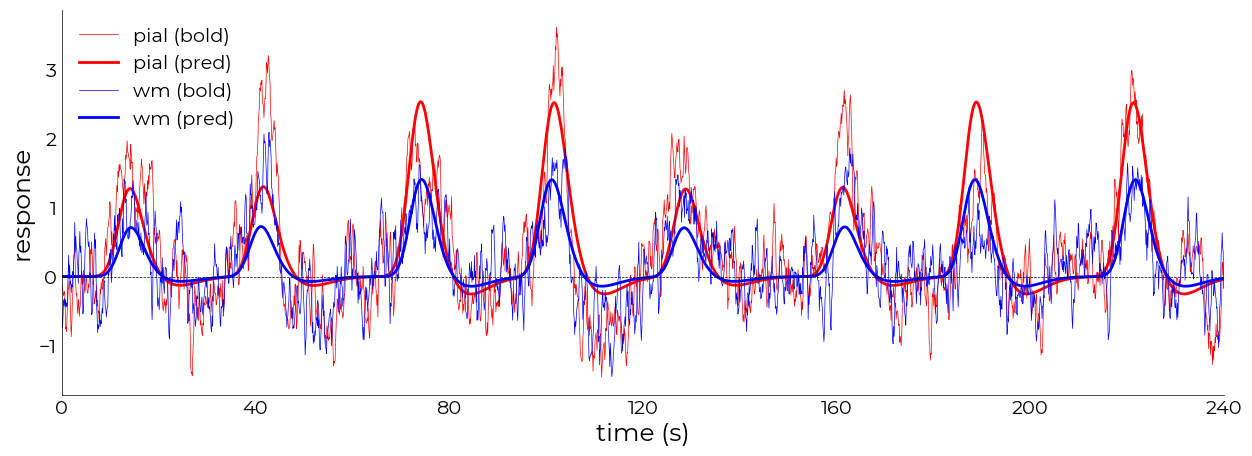

In [24]:
from itertools import repeat
plot_list = [
    im5.pial_tc+abs(pial_pred2[0]),
    pial_pred2+abs(pial_pred2[0]),
    im5.wm_tc+abs(wm_pred2[0]),
    wm_pred2+abs(wm_pred2[0])
]

x_axis = np.array(list(np.arange(0,im5.func.shape[-1])*im5.TR))

plotting.LazyPlot(
    plot_list,
    xx=x_axis,
    line_width=[0.5,2,0.5,2],
    color=[x for item in im5.colors for x in repeat(item, 2)],
    figsize=(15,5),
    x_label="time (s)",
    y_label="response",
    labels=[
        "pial (bold)",
        "pial (pred)",
        "wm (bold)",
        "wm (pred)"],
    x_lim=[0,int(x_axis[-1])],
    add_hline=0,
    x_ticks=list(np.arange(0,x_axis[-1]+40,40)))

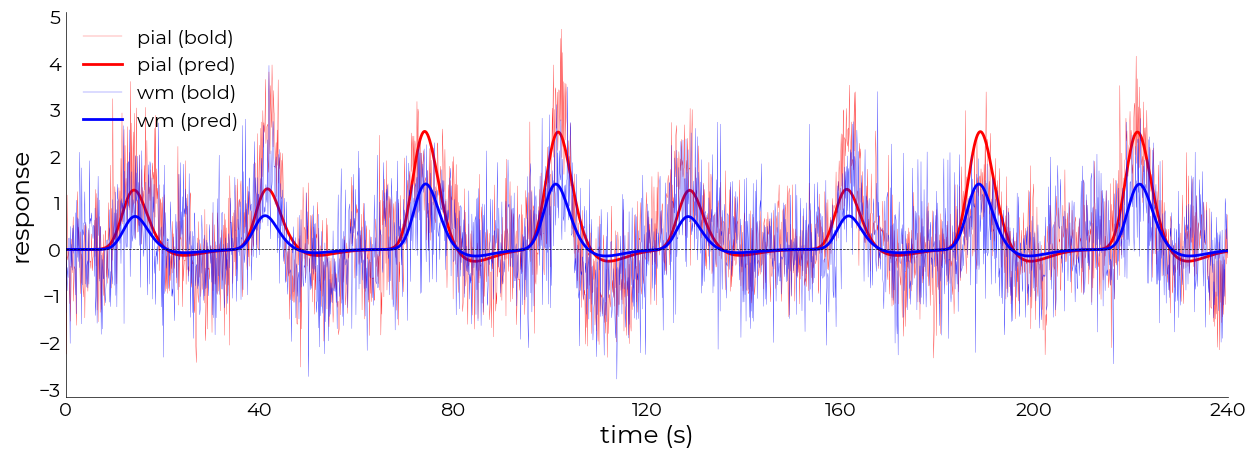

In [22]:
from itertools import repeat
plot_list = [
    pial_raw+abs(pial_pred2[0]),
    pial_pred2+abs(pial_pred2[0]),
    wm_raw+abs(wm_pred2[0]),
    wm_pred2+abs(wm_pred2[0])
]

x_axis = np.array(list(np.arange(0,im5.func.shape[-1])*im5.TR))

plotting.LazyPlot(
    plot_list,
    xx=x_axis,
    line_width=[0.2,2,0.2,2],
    color=[x for item in im5.colors for x in repeat(item, 2)],
    figsize=(15,5),
    x_label="time (s)",
    y_label="response",
    labels=[
        "pial (bold)",
        "pial (pred)",
        "wm (bold)",
        "wm (pred)"],
    x_lim=[0,int(x_axis[-1])],
    add_hline=0,
    x_ticks=list(np.arange(0,x_axis[-1]+40,40)))

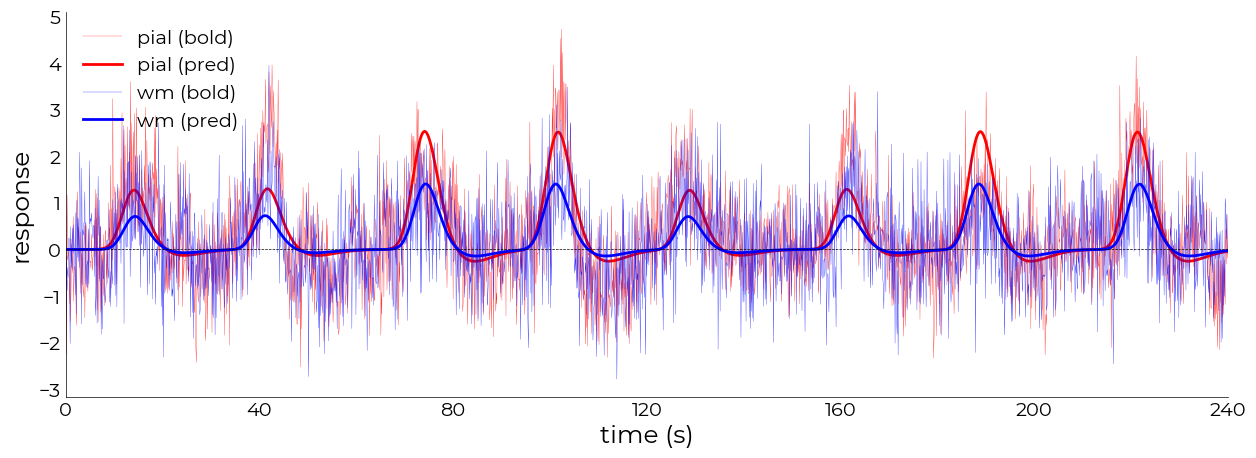

In [28]:
from itertools import repeat
plot_list = [
    pial_raw+abs(pial_pred3[0]),
    pial_pred3+abs(pial_pred3[0]),
    wm_raw+abs(wm_pred3[0]),
    wm_pred3+abs(wm_pred3[0])
]

x_axis = np.array(list(np.arange(0,im5.func.shape[-1])*im5.TR))

plotting.LazyPlot(
    plot_list,
    xx=x_axis,
    line_width=[0.2,2,0.2,2],
    color=[x for item in im5.colors for x in repeat(item, 2)],
    figsize=(15,5),
    x_label="time (s)",
    y_label="response",
    labels=[
        "pial (bold)",
        "pial (pred)",
        "wm (bold)",
        "wm (pred)"],
    x_lim=[0,int(x_axis[-1])],
    add_hline=0,
    x_ticks=list(np.arange(0,x_axis[-1]+40,40)))

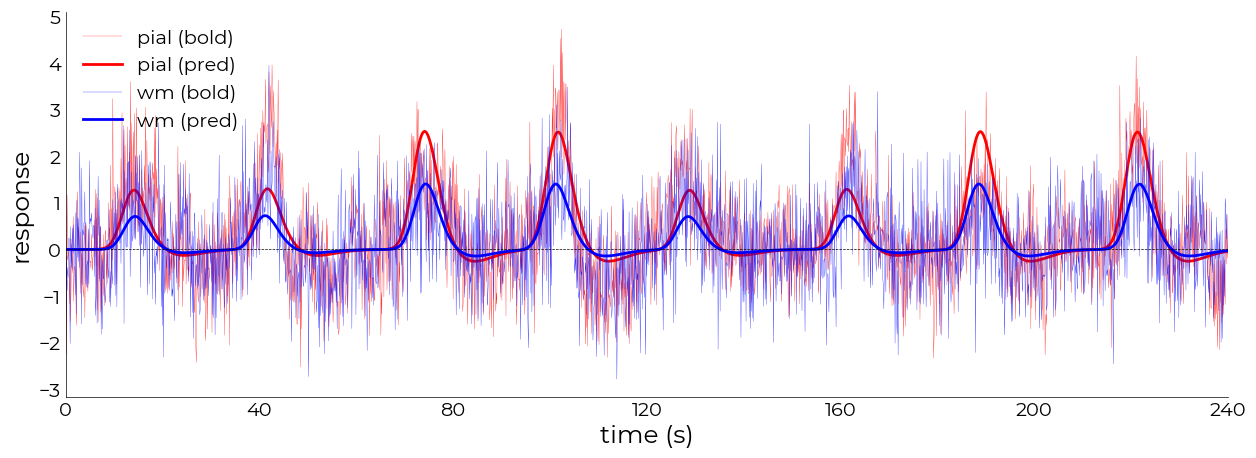

In [32]:
from itertools import repeat
plot_list = [
    pial_raw+abs(pial_pred4[0]),
    pial_pred4+abs(pial_pred4[0]),
    wm_raw+abs(wm_pred4[0]),
    wm_pred4+abs(wm_pred4[0])
]

x_axis = np.array(list(np.arange(0,im5.func.shape[-1])*im5.TR))

plotting.LazyPlot(
    plot_list,
    xx=x_axis,
    line_width=[0.2,2,0.2,2],
    color=[x for item in im5.colors for x in repeat(item, 2)],
    figsize=(15,5),
    x_label="time (s)",
    y_label="response",
    labels=[
        "pial (bold)",
        "pial (pred)",
        "wm (bold)",
        "wm (pred)"],
    x_lim=[0,int(x_axis[-1])],
    add_hline=0,
    x_ticks=list(np.arange(0,x_axis[-1]+40,40)))

Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/figures/sub-all_model-gauss_fig-6_desc-hrf_depth.png'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/figures/sub-all_model-gauss_fig-6_desc-hrf_depth.svg'
Writing '/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/figures/sub-all_model-gauss_fig-6_desc-hrf_depth.pdf'


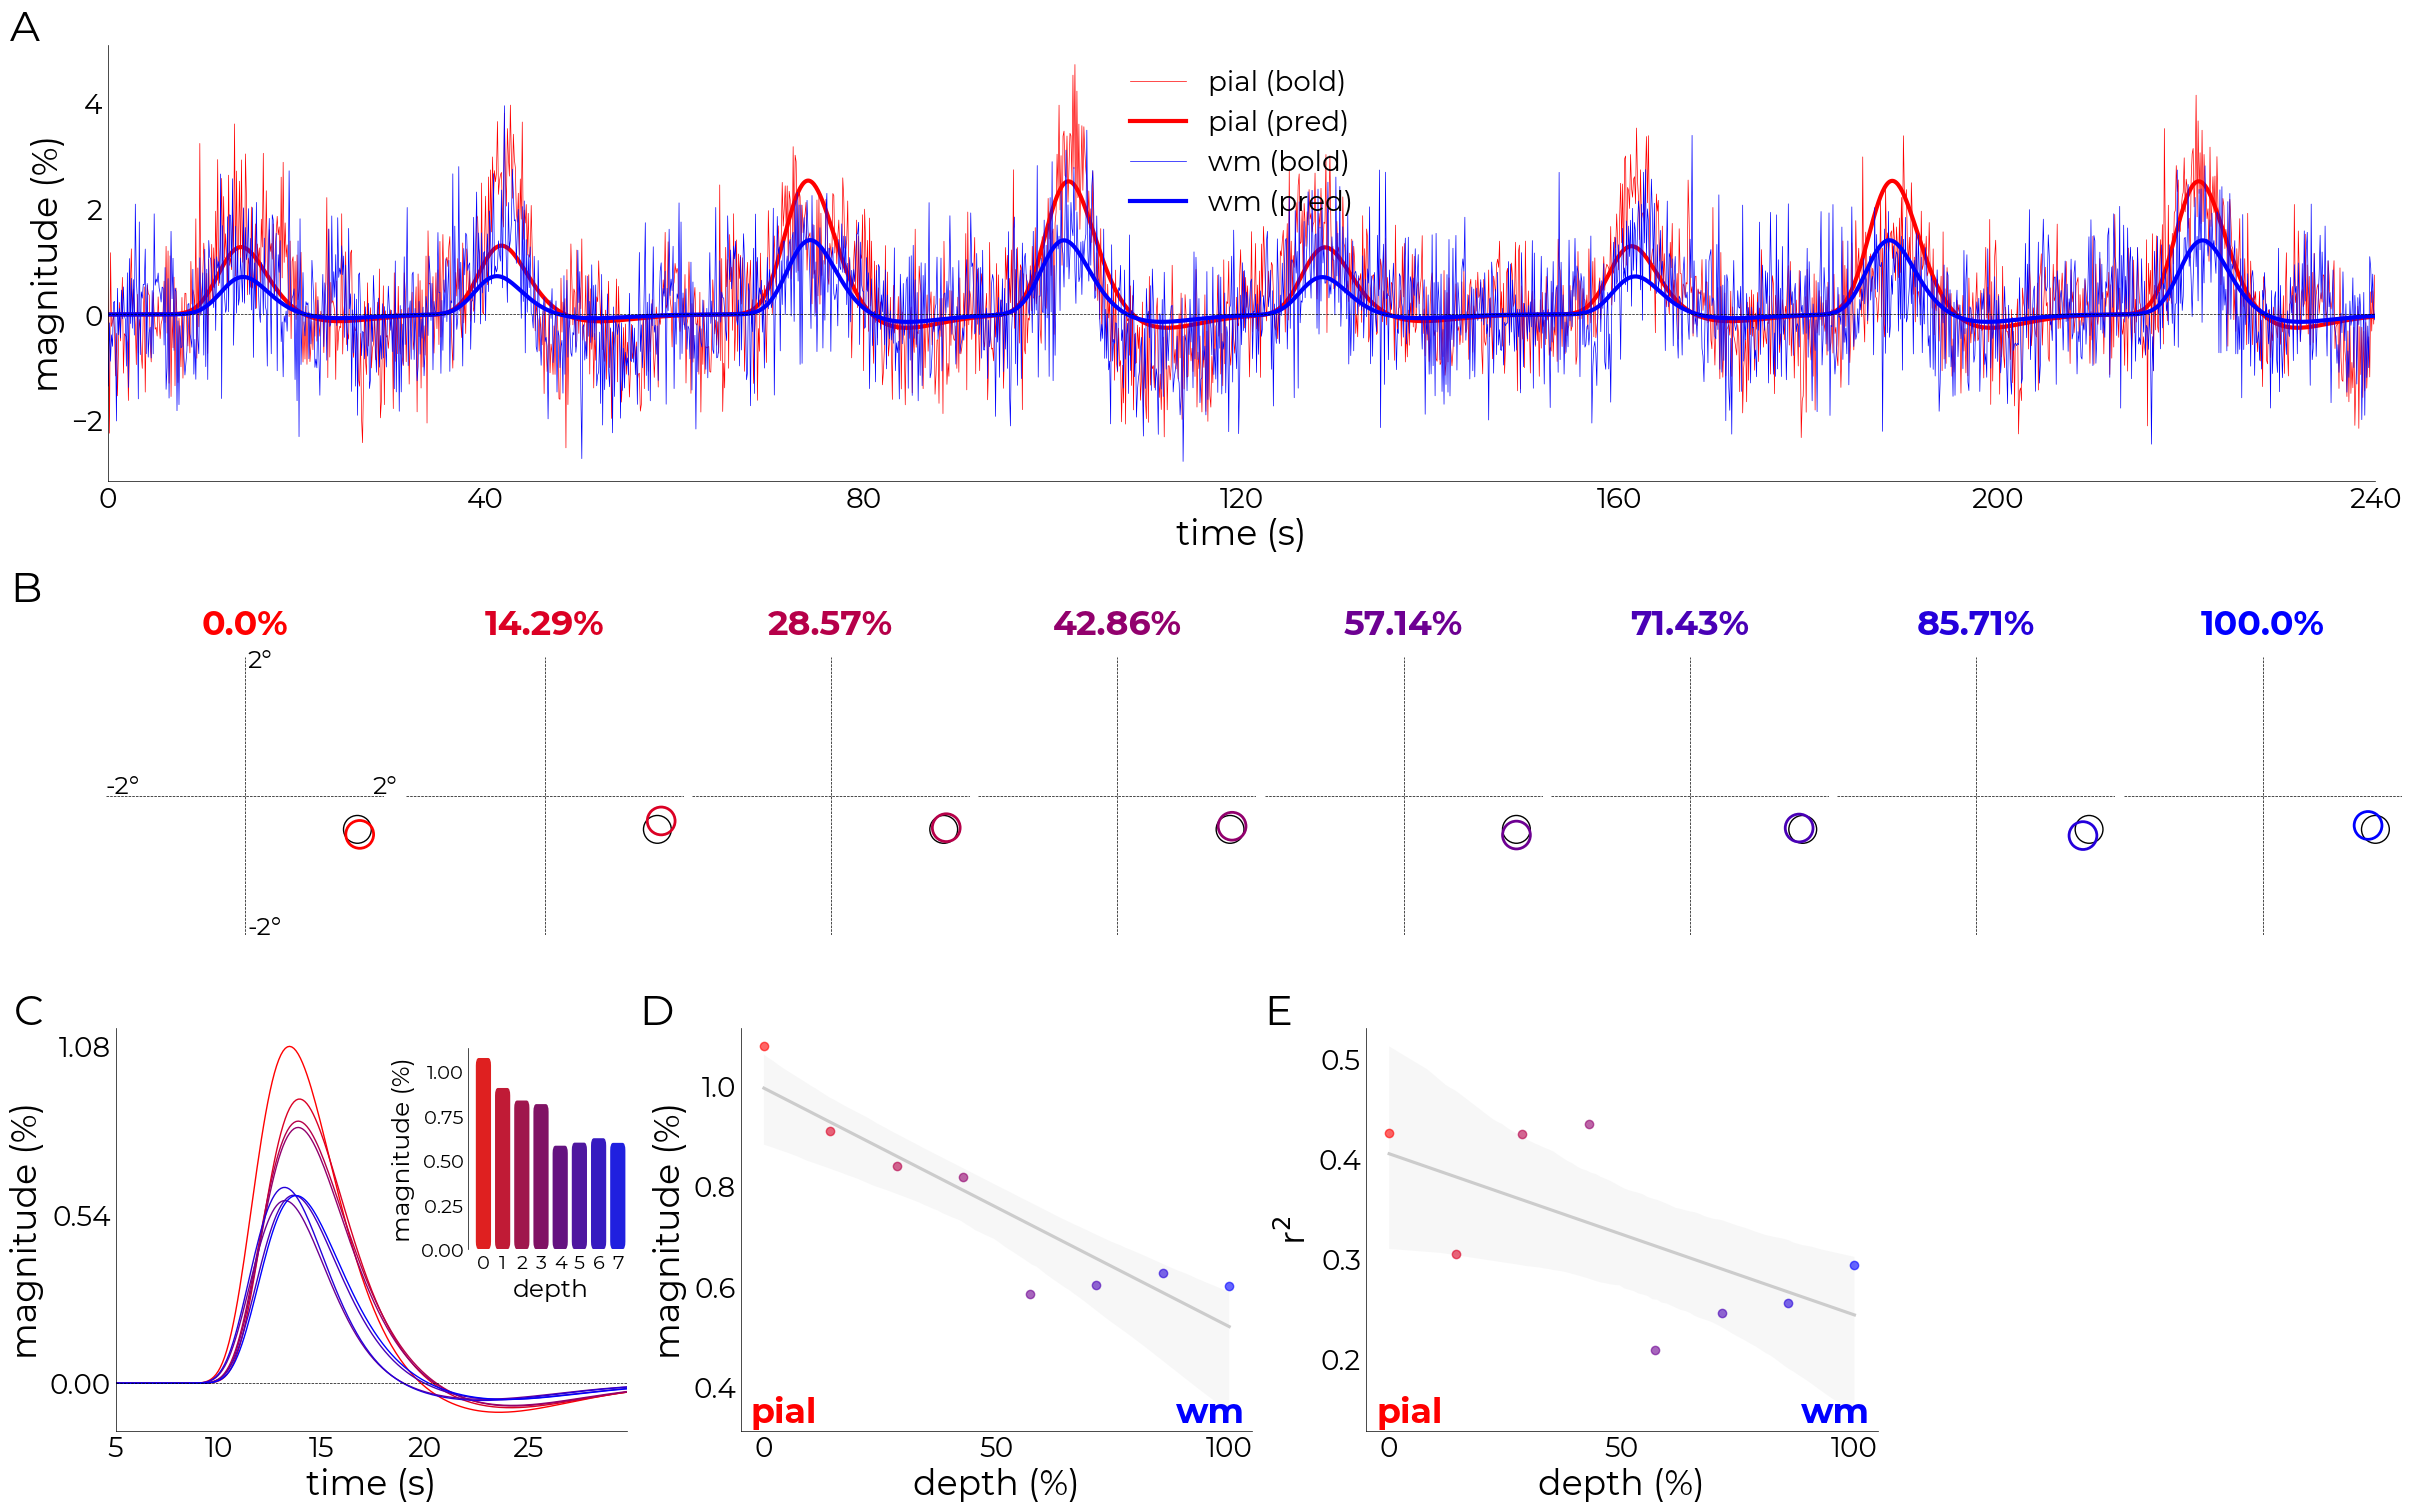

In [33]:
%matplotlib inline
im5.compile_depth_figure2(
    insets="mag",
    extent=[-2,2],
    bar_kwargs={"sns_offset": 4},
    plot_kwargs={
        "font_size": 25,
        "label_size": 20},
    inset_axis=[0.7, 0.45, 0.3, 0.5],
    tcs=plot_list,
    save_as=opj(fig_dir, f"sub-all_model-gauss_fig-6_desc-hrf_depth")
)

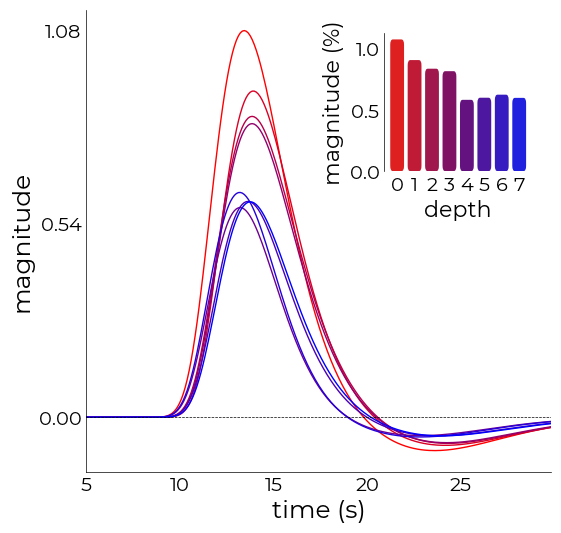

In [94]:
%matplotlib inline
im5.plot_single_hrf_profile(
    subject="sub-003", 
    xlim_left=5, 
    bar_kwargs={
        "sns_offset": 3,
        "font_size": 16,
        "label_size": 14})

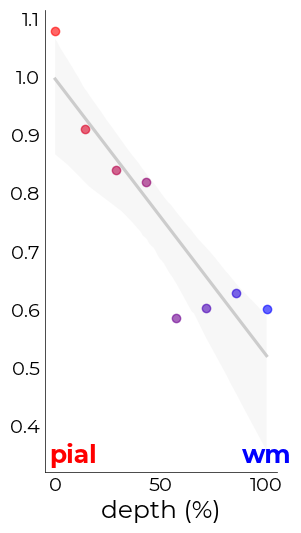

In [134]:
im5.plot_metric_scatter(subject="sub-003")

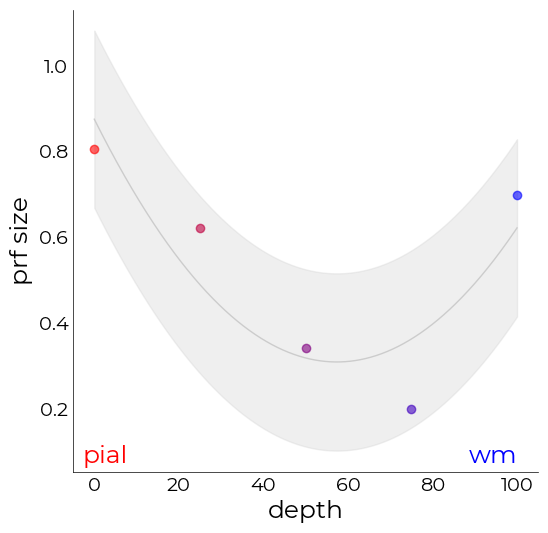

In [270]:
im5.plot_laminar_parameter(subject="sub-007")

[359 360 361 362 363 364 365]
[358 359 360 361 362 363 364 365]
[358 359 360 361 362 363 364 365]
[360 361 362 363 364 365]
[361 362 363 364 365]
[359 360 361 362 363]


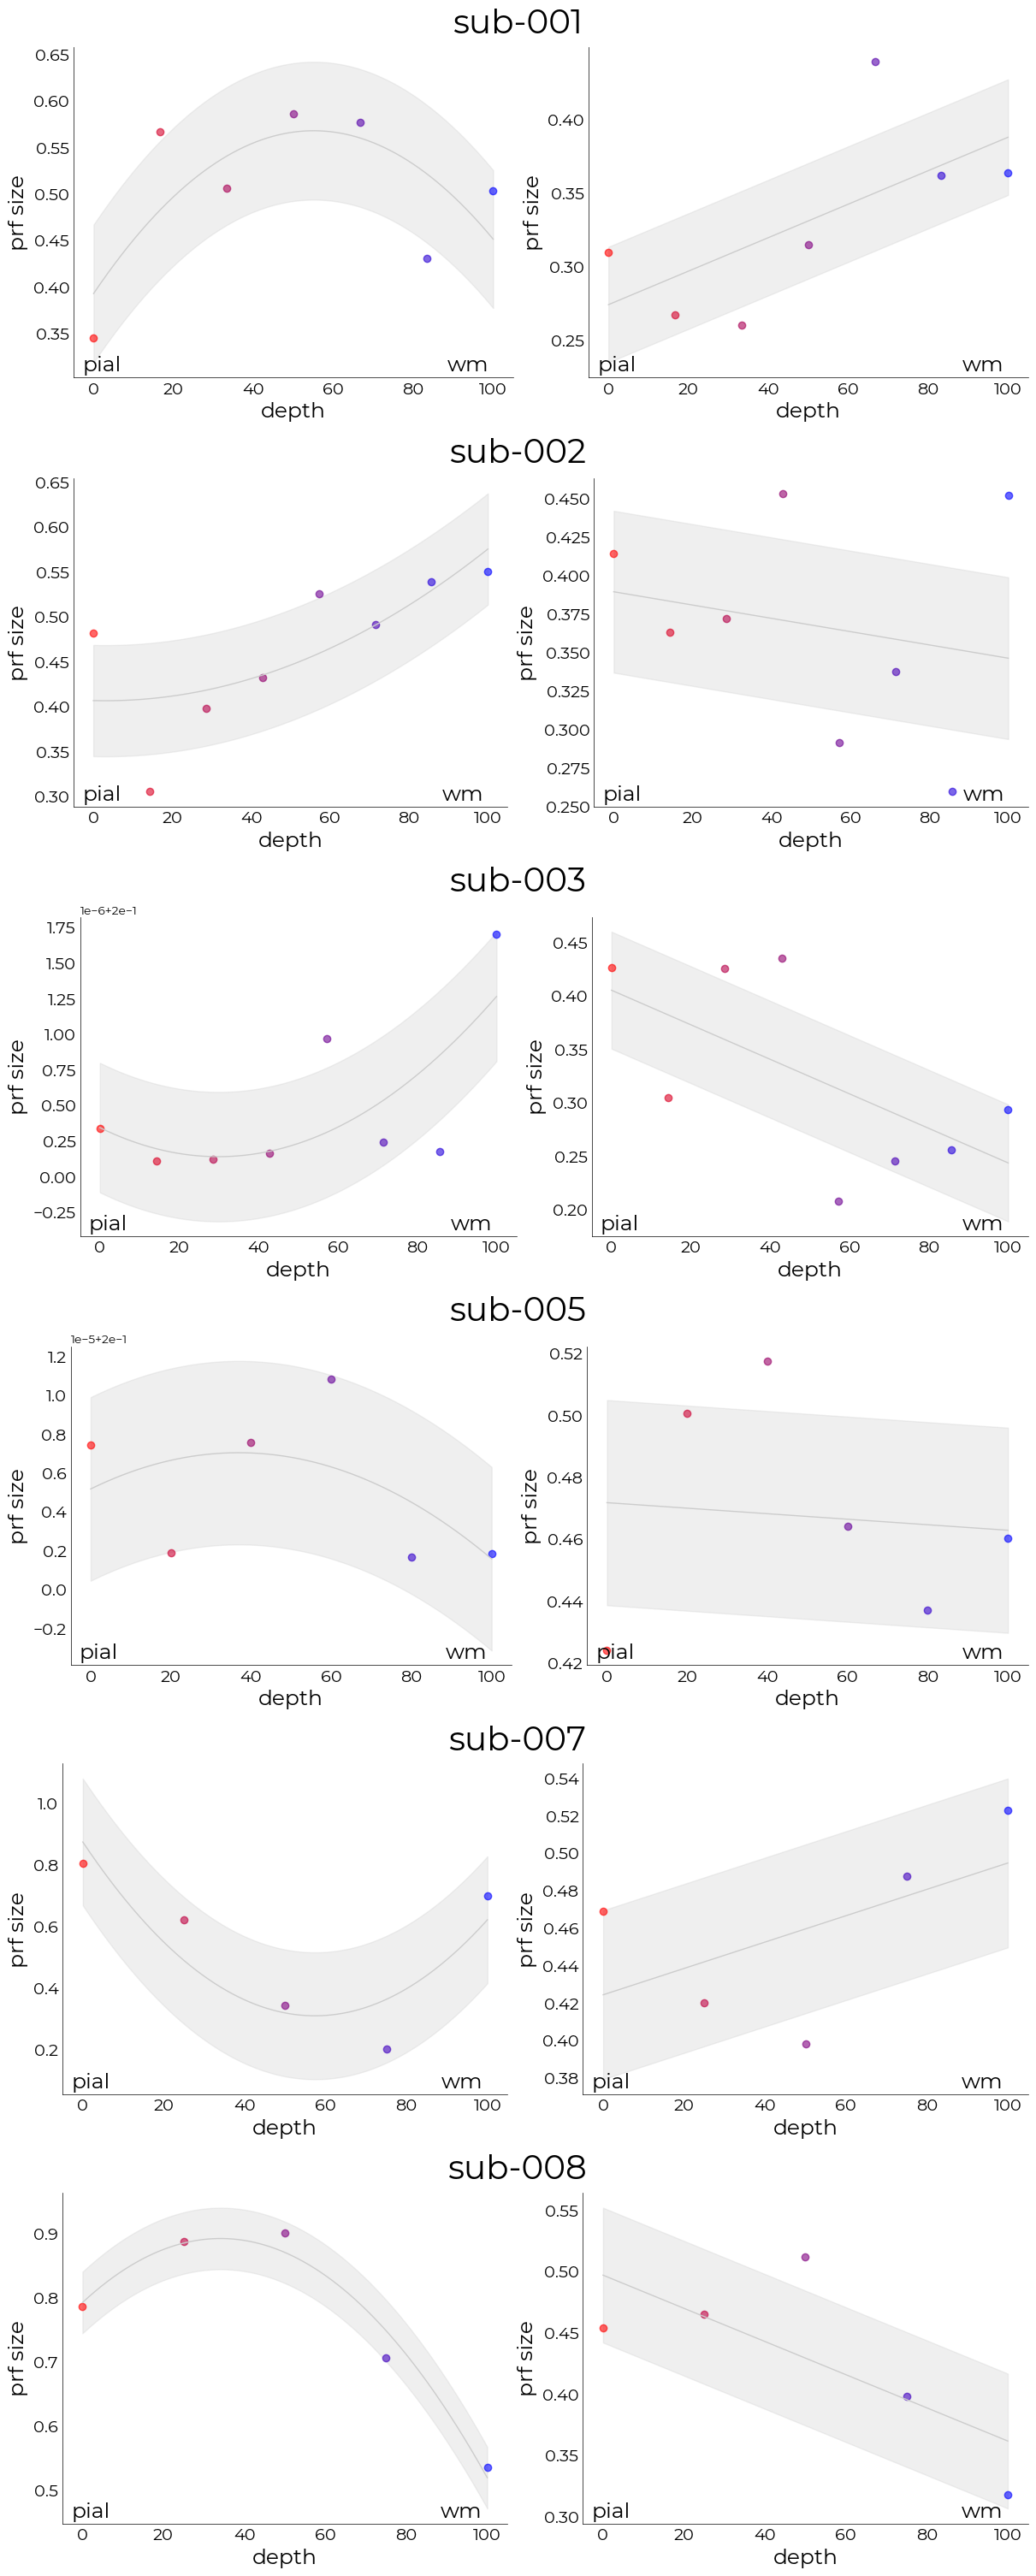

In [267]:
fig = plt.figure(constrained_layout=True, figsize=(12,30))
sf = fig.subfigures(nrows=len(subj_obj.get_subjects()))

for ii, subj in enumerate(subj_obj.get_subjects()):

    vox = np.arange(*subj_obj.get_ribbon(subj))
    print(vox)

    axs = sf[ii].subplots(ncols=2)

    for ix,(par, order) in enumerate(zip(["prf_size", "r2"], [2,1])):
        im5.plot_laminar_parameter(
            subject=subj, 
            par=par, 
            order=order,
            axs=axs[ix])

    sf[ii].suptitle(subj, fontsize=28)

[359 360 361 362 363 364 365]
[358 359 360 361 362 363 364 365]
[358 359 360 361 362 363 364 365]
[360 361 362 363 364 365]
[361 362 363 364 365]
[359 360 361 362 363]


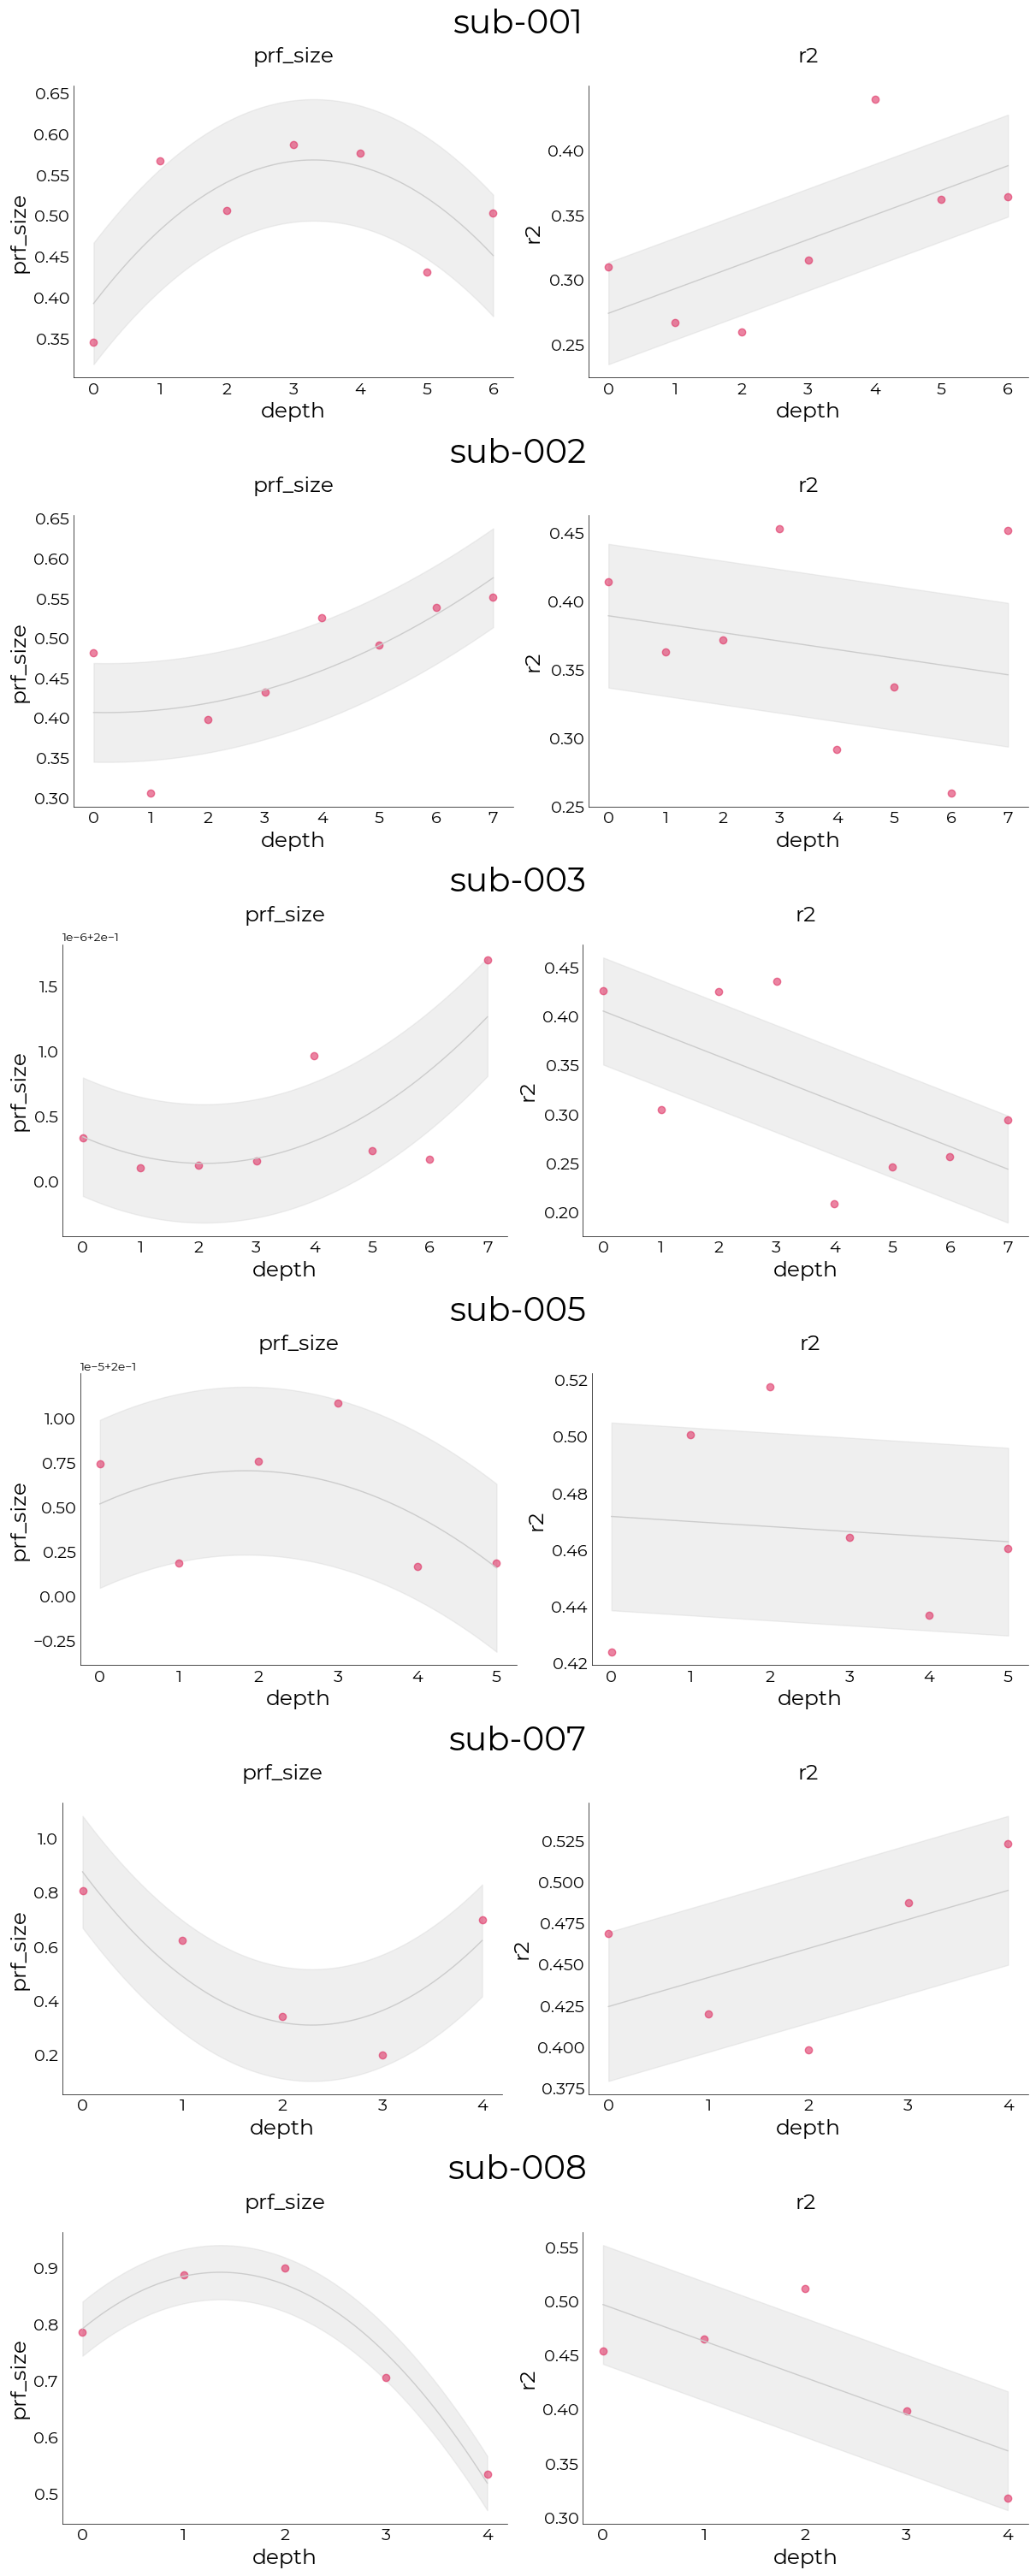

In [136]:
fig = plt.figure(constrained_layout=True, figsize=(12,30))
sf = fig.subfigures(nrows=len(subj_obj.get_subjects()))

for ii, subj in enumerate(subj_obj.get_subjects()):

    vox = np.arange(*subj_obj.get_ribbon(subj))
    print(vox)

    axs = sf[ii].subplots(ncols=2)

    for ix,(par, order) in enumerate(zip(["prf_size", "r2"], [2,1])):
        data = pd.DataFrame(utils.select_from_df(im5.df_params, expression=("code = 4","&",f"subject = {subj}"))[par])

        tmp_ = data.iloc[vox][list(data.columns)[0]].values
        # tmp_ = data.values.squeeze()
        cf = fitting.CurveFitter(tmp_, order=order, verbose=False)

        axs[ix].plot(cf.x, tmp_, 'o', color="#DE3163", alpha=0.6)
        y_ = axs[ix].get_xlim()
        # plot upsampled fit with 95% confidence intervals as shaded error

        pl = plotting.LazyPlot(
            cf.y_pred_upsampled,
            xx=cf.x_pred_upsampled,
            error=cf.ci_upsampled,
            axs=axs[ix],
            color="#cccccc",
            x_label="depth",
            y_label=par,
            x_lim=y_,
            title=par)

    sf[ii].suptitle(subj, fontsize=28)

In [ ]:

tmp_ = prf_sizes.iloc[vox].prf_size.values
tmp_


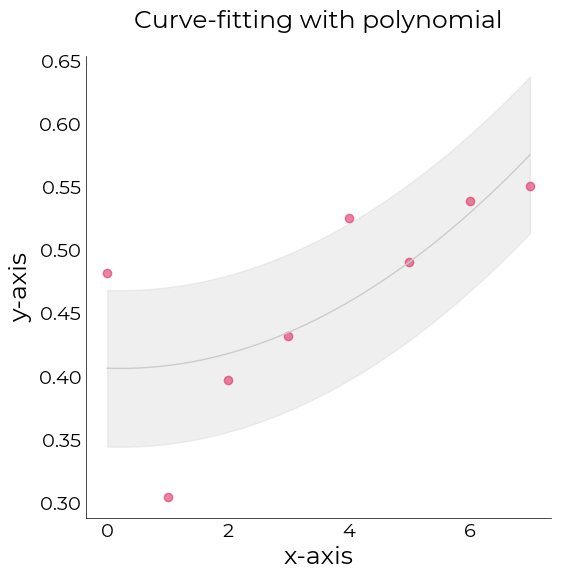

In [123]:
cf = fitting.CurveFitter(tmp_, order=2, verbose=False)
fig, axs = plt.subplots(figsize=(6,6))

# plot original data points

axs.plot(cf.x, tmp_, 'o', color="#DE3163", alpha=0.6)
y_ = axs.get_xlim()
# plot upsampled fit with 95% confidence intervals as shaded error

pl = plotting.LazyPlot(
    cf.y_pred_upsampled,
    xx=cf.x_pred_upsampled,
    error=cf.ci_upsampled,
    axs=axs,
    color="#cccccc",
    x_label="x-axis",
    y_label="y-axis",
    x_lim=y_,
    title="Curve-fitting with polynomial")

plt.show()

